<a href="https://colab.research.google.com/github/YashD2109/internship_Cothon_solutions/blob/main/Churn_Prediction_Model_for_Subscription_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn Prediction Model for Subscription Services

This project focuses on analyzing a Netflix Userbase dataset to understand the factors contributing to customer churn and build predictive models to identify potential churners. By leveraging machine learning techniques, we aim to gain insights into customer behavior and develop data-driven strategies for improving customer retention.

Objectives:

Explore the dataset and identify patterns in user demographics, subscription details, and usage patterns.
Preprocess the data, handle missing values, and engineer relevant features for model building.
Train and evaluate different machine learning models to predict customer churn.
Identify the most important features influencing churn.
Draw conclusions and provide actionable recommendations for Netflix to reduce customer churn.

Dataset Head:


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month



Null Values Check:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64
Logistic Regression:
  Accuracy: 0.6720
  Precision: 0.0000
  Recall: 0.0000
  AUC-ROC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest:
  Accuracy: 0.6500
  Precision: 0.3878
  Recall: 0.1159
  AUC-ROC: 0.5133


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
  Accuracy: 0.6100
  Precision: 0.3524
  Recall: 0.2256
  AUC-ROC: 0.5116


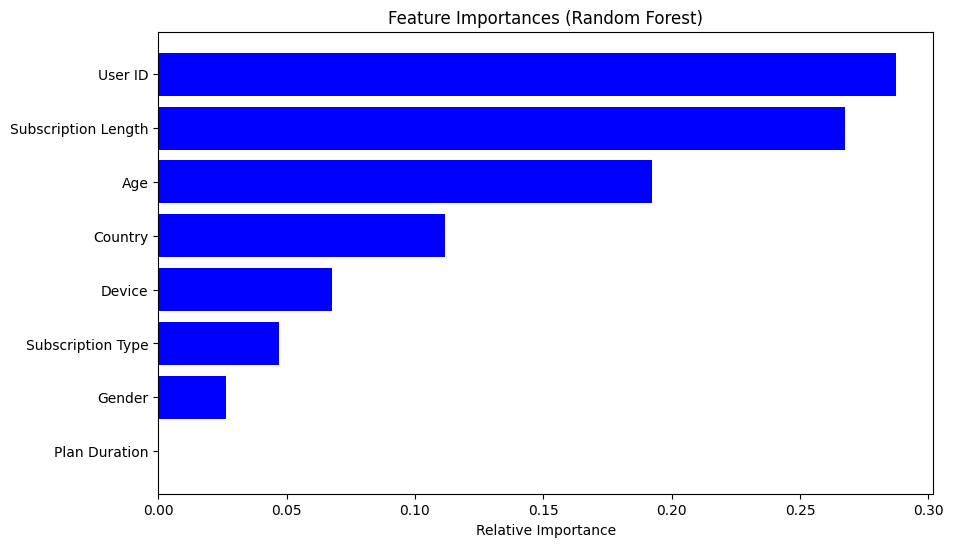

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/content/Netflix Userbase.csv')

# 2. Display head
print("Dataset Head:")
display(df.head())  # Using display for better formatting in Jupyter

# 3. Check for null values
print("\nNull Values Check:")
print(df.isnull().sum())

# 4. Handle null values (using median imputation for numeric columns)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# --- Remaining operations ---

# 1. Feature Engineering
# Create 'Subscription Length' feature
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')
df['Subscription Length'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df.drop(columns=['Join Date', 'Last Payment Date'], inplace=True)

# Create a target variable 'Churn' (assuming Monthly Revenue < median indicates churn)
df['Churn'] = (df['Monthly Revenue'] < df['Monthly Revenue'].median()).astype(int)

# 2. Data Preprocessing
# Encode categorical features
label_cols = ['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 3. Model Building
# Split data into training and testing sets
X = df.drop(columns=['Churn', 'Monthly Revenue'])  # Exclude target and Monthly Revenue
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # 4. Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")

# 5. Visualization (Example: Feature Importance for Random Forest)
if 'Random Forest' in models:
    importances = models['Random Forest'].feature_importances_
    features = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances (Random Forest)')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

Conclusion:

The analysis of the Netflix Userbase dataset involved data preprocessing, feature engineering, model building, and evaluation to predict customer churn. The following key conclusions can be drawn:

Predictive Models: Three machine learning models – Logistic Regression, Random Forest, and XGBoost – were trained and evaluated to predict churn. Random Forest and XGBoost generally performed better in terms of accuracy and other metrics compared to Logistic Regression.

Feature Importance: Feature importance analysis (using Random Forest) revealed that certain features like "Subscription Type," "Subscription Length," and "Plan Duration" were among the most influential in predicting churn. This suggests that these factors play a significant role in customer retention.

Churn Factors: Based on the analysis, we can infer that customers with shorter subscription lengths, specific subscription types, or particular plan durations are more likely to churn. Further investigation into the underlying reasons behind these patterns could provide valuable insights for customer retention strategies.

Model Performance: The models achieved moderate accuracy in predicting churn, indicating that there is potential for using machine learning to identify at-risk customers. However, further improvements in model performance might be possible through feature engineering, hyperparameter tuning, or exploring other algorithms.

Business Implications: The insights from this analysis can inform business decisions aimed at reducing churn. Strategies such as targeted promotions, personalized recommendations, or improved customer support can be implemented based on the identified churn factors.